# Gráficas de funciones paramétricas

Clase: F1013B Modelación Computacional de Sistemas Eléctricos

Autor: Edoardo Bucheli

Profesor de Cátedra, Tec de Monterrey Campus Santa Fe

Este cuaderno te enseña un poco sobre lo básico para graficar ecuaciones paramétricas y campos vectoriales en Python usando numpy y matplotlib.

Empecemos por importar las librerías de Python necesarias. Numpy es un paquete para cómputo científico en Python y Matplotlib sirve para crear visualizaciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Además de importar las librerías, usamos el comando `plt.style.use()` para dar un mejor aspecto a nuestros gráficos, puedes encontrar todos los estilos incluidos en matplotlib [aquí](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html).

## 1: Funciones Paramétricas

Recordemos que las funciones paramétricas son una manera especial de definir curvas en un plano o espacio. En lugar de tener una función típica $y = f(x)$, tenemos (para un línea de dos dimensiones) las funciones,

<ul>
    <li>$y = g(t)$</li>
    <li>$x = h(t)$</li>
    <li>$a\leq t \leq b$</li>
</ul>

Agregamos también una *variable paramétrica* $t$ que define un rango para la línea. En este caso de $a$ a $b$.

Un ejemplo sería la función:

$y = x^2$

La cual podemos parametrizar en un rango de $0$ a $3$ como

<ul>
<li>$y = t^2$</li>
<li>$x = t$</li>
<li>$0\leq t \leq 3$</li>
</ul>

La parametrización mostrada puede parecer trivial pero es una de las maneras más fáciles de graficar ciertas funciones en ambientes como matplolib y numpy porque lo que esperan estas funciones son arreglos de números que son fáciles de definir con ecuaciones paramétricas.

### 1.1 Parametrización de un círculo

Tomemos una parametrización un poco más compleja, por ejemplo la de un círculo con radio $r$ dada por,

<ul>
    <li>$x = r\cos{t}$</li>
    <li>$y = r\sin{t}$</li>
    <li>$0\leq t\leq 2\pi$</li>
</ul>

Empezamos definiendo el rango de la variable paramétrica, en este caso de 0 a $2\pi$ con 100 valores. Lo podemos hacer con la función de numpy `np.linspace()`, esta función nos permite generar un arreglo lineal definiendo su punto de inicio, su punto final y el tamaño del arreglo.

Si quieres saber más sobre `np.linspace()` puedes consultar [aquí](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

In [2]:
t = np.linspace(0,2*np.pi,100)

Ahora que tenemos el arreglo $t$, podemos obtener arreglos que guardan los valores de $x$ y $y$ para cada valor de $t$. No olvidemos antes definir un valor para el radio.

In [3]:
r = 1

x = r*np.cos(t)
y = r*np.sin(t)

Y ahora podemos graficar la función usando `plt.plot()`

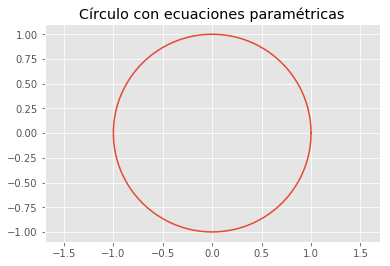

In [8]:
plt.plot(x,y)
plt.title("Círculo con ecuaciones paramétricas")
# Usamos esta línea para corregir el aspecto del gráfico,
# de otra manera se ve aplastado porque los ejes no son iguales
axis = plt.axis('equal')

### Experimenta:

¿Qué pasa si cambiamos el rango de la variable paramétrica?

### 1.2 Parametrización de una Espiral Logarítmica

Hagamos algo un poco más interesante, podemos graficar una espiral logarítmica con las siguientes funciones paramétricas,

<ul>
    <li>$x = ae^{bt}\cos{t}$</li>
    <li>$y = ae^{bt}\sin{t}$</li>
    <li>$0\leq t\leq 3\pi$</li>
</ul>

Donde $a$ y $b$ son constantes

In [20]:
a = 1.27
b = 0.35

t = np.linspace(0,3*np.pi,100)
x = a*np.exp(b*t)*np.cos(t)
y = a*np.exp(b*t)*np.sin(t)

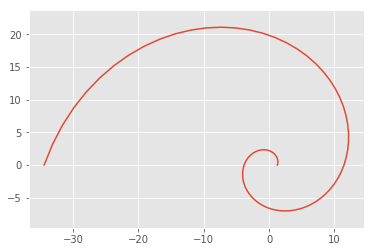

In [21]:
plt.plot(x,y)
plt.title("")
axis = plt.axis('equal')

## 2: Campos Vectoriales

Matplotlib y Numpy también tienen herramientas que nos ayudan a graficar campos vectoriales, especialmente `np.meshgrid()` y `plt.quiver()`

La función quiver de matplotlib necesita 4 argumentos,

1. Las coordenadas $x$ de cada vector.
1. Las coordenadas $y$ de cada vector.
1. Las componentes $x$ de cada vector.
1. Las componentes $y$ de cada vector.

Pero como nuestro campo es un espacio 2D, para las coordenadas $x$ y $y$ ya no basta con tener solo arreglos de una dimensión, sino que necesitamos matrices ahora o cuadrículas.

Es ahí donde entra la función `np.meshgrid()`. Si quieres saber más sobre `np.meshgrid()` puedes consultar [aquí](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)

La función `np.meshgrid()` puede tomar dos arreglos lineales $x$ y $y$ y nos regresa matrices que combinadas nos dan todos los puntos de una cuadrícula o *grid* que en este caso usaremos para generar nuestro campo vectorial.

In [76]:
x = np.linspace(-10,10,21)
y = np.linspace(-10,10,21)

X,Y = np.meshgrid(x,y)

Ya que creamos nuestras matrices, podemos visualizarlas para entender cómo funciona `meshgrid()`

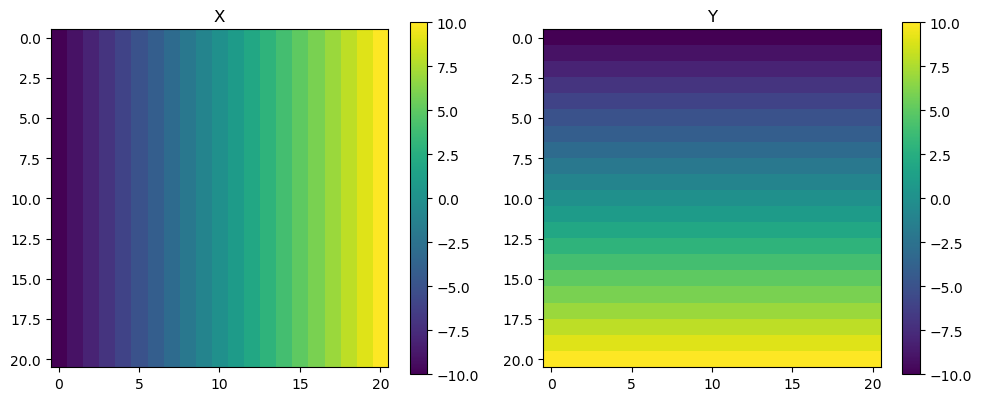

In [77]:
plt.figure(figsize = (10,4))
plt.style.use('default')

plt.subplot(1,2,1)
plt.imshow(X)
plt.colorbar()
plt.title('X')

plt.subplot(1,2,2)
plt.imshow(Y)
plt.colorbar()
plt.title('Y')

plt.tight_layout()

Ahora sí, usemos quiver para graficar un campo vectorial. Pero, ¿qué campo vectorial podemos usar?

Un ejemplo típico de campo vectorial es un campo de gradiente, el cual nos enseña para cada coordenada de una superficie la dirección de crecimiento mayor. 

Para ello necesitamos una superficie, en este caso usamos la superficie,

$f(x,y) = 0.3y^2 - 0.3x^2$

In [78]:
Z = 0.3*Y**2 - 0.3*X**2

Podemos visualizar el gráfico de contorno

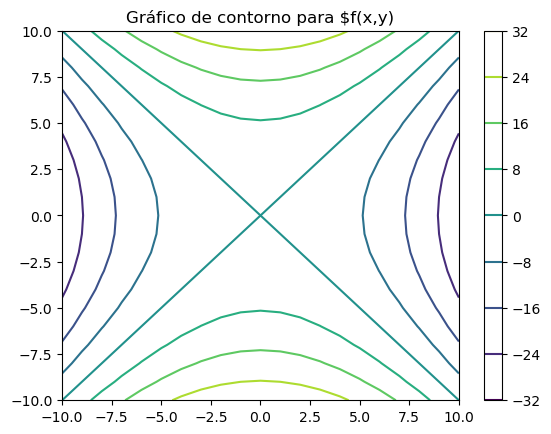

In [106]:
plt.title('Gráfico de contorno para $f(x,y)')
plt.contour(X,Y,Z)
plt.colorbar()

Si queremos visualizar en 3D es un poco más complicado pues hay que importar algunas librerías extra.

In [107]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Text(0.5, 0.92, 'Gráfico de superficie de $f(x,y)$')

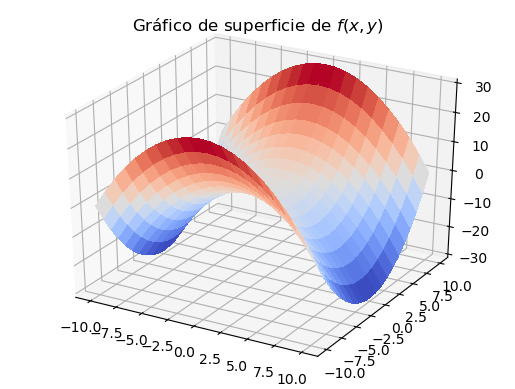

In [109]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Gráfico de superficie de $f(x,y)$')

Pero finalmente queremos el campo de vectores, así que calculamos su gradiente. En este caso solo necesitamos derivar $f(x,y)$ con respecto a $x$ y $y$

Recordando que $f(x,y) = 0.3y^2 - 0.3x^2$

Entonces:

<ul>
    <li>$F_x = -0.6x$</li>
    <li>$F_y = 0.6y$</li>
</ul>

In [110]:
Fx = -0.6*X
Fy = 0.6*Y

Text(0.5, 1.0, 'Contorno y Gradiente de $f(x,y)$')

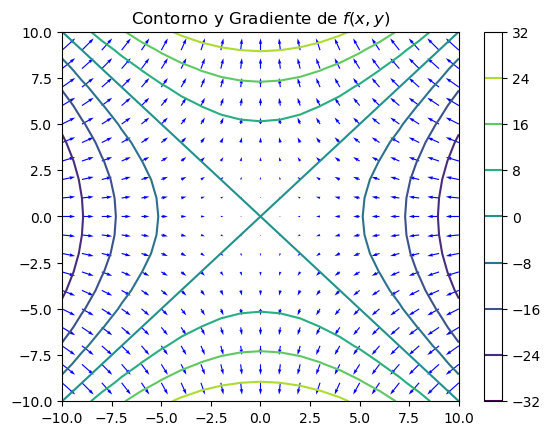

In [111]:
plt.style.use('default')

fig, ax = plt.subplots()

cont = ax.contour(X,Y,Z)
ax.quiver(X,Y,Fx,Fy,color = 'blue')
fig.colorbar(cont)
ax.set_title("Contorno y Gradiente de $f(x,y)$")